# Scaling the Energy Equation

## The problem with $h$

So far when we've talked about convection, we've depended on the convection coefficient $h$.  This is a helpful way to estimate convection fluxes.  The problem with $h$, though, is that it is dependent on a range of complex variables: geometry, velocity, flow patterns, turbulence, etc...  Because of this, $h$ is almost always estimated by experimentation.

<br>

It would be helpful to be able to solve a heat transfer problem without doing an experiment.  And happily, there is a way.  And here it is!:

<br>

$$\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0$$

<br>

$$\rho g_x-\frac{\partial p}{\partial x}+\mu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)=\rho\left(\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}+v \frac{\partial u}{\partial y}\right)$$

<br>

$$\rho g_y-\frac{\partial p}{\partial y}+\mu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)=\rho\left(\frac{\partial v}{\partial t}+u \frac{\partial v}{\partial x}+v \frac{\partial v}{\partial y}\right)$$

<br>

$$\rho C\left(\frac{\partial T}{\partial t}+u \frac{\partial T}{\partial x}+v \frac{\partial T}{\partial y}\right)=k\left(\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}\right)+\dot{q}+\mu\left(2\left(\frac{\partial u}{\partial x}\right)^2+2\left(\frac{\partial v}{\partial y}\right)^2+\left(\frac{\partial u}{\partial y}+\frac{\partial v}{\partial x}\right)^2\right)$$

<br>

<center>
<img src = https://github.com/AugustanaPEA/ENGR_321/raw/main/Images/Scaling/joke.PNG width = 250>
</center>

<br>

Well, no one said it was an *easy* way to solve a problem.  

<br>

These 4 equations are the conservation of mass, the Navier-Stokes (in the x- and y- directions), and the energy equation.  Analytical solutions are hard to come by, as you might imagine (nothing quite like 4 interdependent, non-linear, second-order partial differential equations!).  However they are usable, in 2 key ways:

<br>

- these equations are the basis of most computational solutions to heat transfer problem that involves the movement of fluid.
- just as important for our purposes, they provide a way to *understand* the physical processes of convection.

<br>

And this notebook explores scaling as a way towards that second goal.  

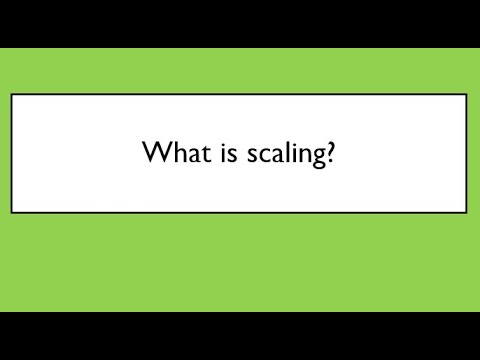

In [1]:
# @title Video: What does it mean to scale an equation? {display-mode: "form" }
from IPython.display import YouTubeVideo

def display_video(video_id, W=400, H=300, fs=1):
    video = YouTubeVideo(id=video_id, width=W, height=H, fs=fs, rel=0)
    display(video)
    #print(f'Video available at https://youtube.com/watch?v={video.id}')
    return

video_id = 'hBg9Q77aNUo'
display_video(video_id, W=600, H=450)

<br><br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---



Now answer the questions below about Couette flow.  Couette flow is a laminar flow created in a fluid between two closely-separated walls when one of the walls moves and the other stays still.  The resulting velocity gradient in the y-direction is linear (as shown):

<br>

<center>
<img src = https://github.com/AugustanaPEA/ENGR_321/raw/main/Images/Scaling/couette.PNG width = 250>
</center>

<br>

For the purposes of the question below, the values for this flow are:

<br>

$$u_{\infty} = 10 m/s~~~~T_{top} = 100^{\circ} C ~~~~T_{bottom} = 50^{\circ} C ~~~~L=0.03 m$$



In [2]:
import pandas as pd
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name
home = 'https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/3_Convection_Scaling/Embedded_Qs/'
efile = 'energy_equation'

#@title Quantitative Question (Enter the correct value) {form-width: "50%", display-mode: "form" }
data = display_Quant(efile,home,0)
answer = None #@param {type:"number"}
check_Quant(data,answer)

Using the equations for u* and y* in the video, what is the value of the derivative "du*/dy*"?  See if you can figure this out; if you get stuck, make a guess and follow the directions in the comments.



---

A common scaling techique for temperature is to set the nondimensional $\theta^*$ like this:

<br>

$$\theta^* = \frac{T-T_{cold}}{T_{hot}-T_{cold}}$$

<br>

Use this formulation to answer the next question.

In [3]:
#@title #### Multiple Choice { run: "auto", form-width: "50%", display-mode: "form" }
data = display_multC(efile,home,1)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

What is the range of possible values for theta^* in our Couette flow?

A) From 20 to 100 degrees
B) From 20 to 100
C) From 0 to 80 degrees
D) From 0 to 1 
E) From 0 to 100


In [4]:
#@title #======================================= {form-width: "50%", display-mode: "form" }
#@markdown ##### *Quantitative Question* <br><br>Enter your answer, and run the cell to check your answer.  <br><br>
data = display_Quant(efile,home,2)
answer = None #@param {type:"number"}
check_Quant(data,answer)

If you found that the temperature at a given point in the temperature field was theta^* = 0.65, what would the temperature be at that point in degrees C?



In [5]:
#@title #======================================= { form-width: "50%", display-mode: "form" }
#@markdown ##### <br> *Multiple Answer Question* <br><br>Enter the all the correct letters, with a space in between each, and run the cell to check your answer.  <br><br>
data = display_multAns(efile, home,3)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_multAns(data,a)

Which of the following is true of the calculation from the previous questions? (Mark all that are true)

A) If we changed the values for L, u, T_top, and T_bottom, we would get the same answer to the first two questions
B) All scaled values (with the *) have no units
C) We solve a single problem using nondimensional numbers and then convert our answers back to variables with units for a wide range of similar problems (i.e. lots of variations on a Couette flow)


---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>



## The Scaled Momentum Equation

We scaled the conservation of mass equation in the video above.   We can perform a similar process with the other 3 equations above.  The resulting equations are not *easy*, by any means, but they do provide some insight into how convective flows work.

<br>

Here, for instance, is the scaled version of the x-direction momentum equation (commonly known as a Navier-Stokes equation):

<br>

$$\frac{\partial u^*}{\partial t^*}+u^* \frac{\partial u^*}{\partial x^*}+v^* \frac{\partial u^*}{\partial y^*}=-\frac{\partial p^*}{\partial x^*}+\frac{\nu}{L U_{\infty}}\left(\frac{\partial^2 u^*}{\partial x^{* 2}}+\frac{\partial^2 u^*}{\partial y^{* 2}}\right)$$

<br>

Notice the coefficient of the last term.  Looks familiar, right?  Maybe?  It's the Reynolds number, but upside down! Let's see why it's here.

<br>

The Navier-Stokes equation is a representation of the Second Law of motion, and if we rewrite it, we can see that:

<br>

$$a_x = \frac{F_x}{m}$$

<br>

$$a_x = F_{pressure,x} + F_{friction,x}$$

<br>

$$\frac{\partial u^*}{\partial t^*}+u^* \frac{\partial u^*}{\partial x^*}+v^* \frac{\partial u^*}{\partial y^*}=-\frac{\partial p^*}{\partial x^*}+\frac{1}{Re}\left(\frac{\partial^2 u^*}{\partial x^{* 2}}+\frac{\partial^2 u^*}{\partial y^{* 2}}\right)$$

<br>

The second derivatives in the last term represent the diffusion of momentum caused by viscosity.  If the Reynolds number is high--that is, if inertia in the system is much higher than viscous forces--that term approaches zero, and we can ignore it.  But if $Re$ is low, then viscosity can make significant changes to the velocity.

<br>

So scaling the equation not only allows us to compare similar situations after solving the problem only once, it helps us understand and simplify the problem.  


## The Scaled Energy Equation

Scaling the energy equation yields similar results, and introduces us to some key nondimensional numbers for heat transfer.   Watch this video to find out more!

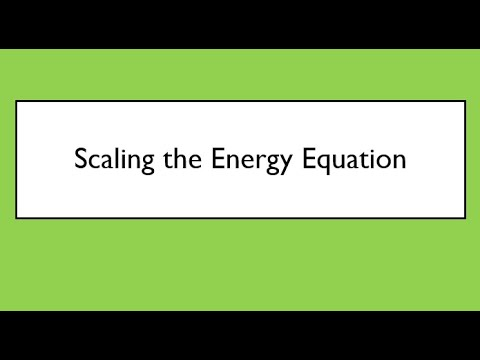

In [6]:
# @title Video: Scaling the Energy Equation {display-mode: "form" }
from IPython.display import YouTubeVideo

def display_video(video_id, W=400, H=300, fs=1):
    video = YouTubeVideo(id=video_id, width=W, height=H, fs=fs, rel=0)
    display(video)
    #print(f'Video available at https://youtube.com/watch?v={video.id}')
    return

video_id = 'il5xBKEhFXo'
display_video(video_id, W=600, H=450)

<br><br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br>

In [7]:
#@title { form-width: "50%", display-mode: "form" }
#@markdown ##### <br> *Multiple Answer Question* <br><br>Enter the all the correct letters, with a space in between each, and run the cell to check your answer.  <br><br>
data = display_multAns(efile, home,4)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_multAns(data,a)

If a flow had a high Peclet number, what would be true of the flow?  (Mark all that are true)

A) Most of the heat transfer in the flow would be cause by bulk fluid motion.
B) We could ignore the thermal diffusion term in the energy equation.
C) We could ignore the friction term in the energy equation.
D) We could ignore the advection term in the energy equation.


In [8]:
#@title #======================================= { run: "auto", form-width: "50%", display-mode: "form" }
#@markdown #####*Multiple Choice*:  <br><br> Choose the correct letter.  <br><br>
data = display_multC(efile,home,5)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

If we were interested in small changes in temperature in a high velocity flow whose temperature ranged only over a couple degrees, which of the following would be true?

A) The frictional production of thermal energy would be insignificant and the Ec/Re ratio would be high.
B) The frictional production of thermal energy would be important and the Ec/Re ratio would be high.
C) The frictional production of thermal energy would be insignificant and the Ec/Re ratio would be low.
D) The frictional production of thermal energy would be important and the Ec/Re ratio would be low.


---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>



## Solving Couette Flow Nondimensionally

So how do you actually use a scaled equation?  Let's look at Couette flow:

<br>

<center>
<img src = https://github.com/AugustanaPEA/ENGR_321/raw/main/Images/Scaling/couette.PNG width = 300>
</center>

<br>

Assume that this steady-state, and that nothing changes in the x-direction; the flow is laminar, so there is no velocity $v$ in the y-direction.  Furthermore, let's say that we have already solved the momentum equations for this scenario, which would provide us with the insight that the velocity distrbution was linear:

<br>

$$\frac{du}{dy} =\frac{U_\infty}{L}~~(constant)$$

<br>

Here's the scaled energy equation:

<br>

$$\frac{\partial \theta^*}{\partial t^*}+u^* \frac{\partial \theta^*}{\partial x^*}+v^* \frac{\partial \theta^*}{\partial y^*}=\frac{1}{R e \cdot \operatorname{Pr}}\left(\frac{\partial^2 \theta^*}{\partial x^{* 2}}+\frac{\partial^2 \theta^*}{\partial y^{* 2}}\right)+\frac{E c}{R e}\left(2\left(\frac{\partial u^*}{\partial x^*}\right)^2+2\left(\frac{\partial v^*}{\partial y^*}\right)^2+\left(\frac{\partial u^*}{\partial y^*}+\frac{\partial v^*}{\partial x^*}\right)^2\right)$$

<br>

Just like with an unscaled version, we want to simplify, simplify, simplify.  We know that this is steady-state, and that nothing changes in the x-direction.  So we can get rid of any term with a $\partial t$ or $\partial x$ in the denominator.  And remember that any term with a y-direction velocity $v$ will be zero. This helps a lot!

<br>

$$0=\frac{1}{R e \cdot \operatorname{Pr}}\left(\frac{\partial^2 \theta^*}{\partial y^{* 2}}\right)+\frac{E c}{R e}\left(\frac{\partial u^*}{\partial y^*}\right)^2$$

<br>

Remember the question earlier about $\frac{\partial u^*}{\partial y^*}$?  Do you remember what its value is?  It has a scaled value of 1.0, because the change in velocity is one characteristic velocity unit $u_\infty$ over one characteristic length $L$.  So this simplifies even further.  Once we multiply both sides by $Re$ and $Pr$, we get:

<br>

$$\frac{\partial^2 \theta^*}{\partial y^{* 2}} = -EcPr$$

<br>

This tells us that our temperature field (in the y-direction) has a curvature of $-EcPr$, where:

<br>

$$Ec = \frac{U_\infty^2}{C(T_{hot}-T_{cool})} = \frac{kinetic~energy}{thermal~energy}$$

<br>

$$Pr = \frac{\nu}{\alpha} =\frac{momentum~diffusivity}{thermal~diffusivity}$$

<br>

So in short, if there is a lot of kinetic energy to create viscous friction, the solution will be more curved.  Likewise, if the thermal energy is slow to diffuse (a high $Pr$), the solution will be more curved.  If we set the two simple BCs to $\theta (0) = 0$ and $\theta (1) = 1$, we'll get a quadratic solution to the differential equation:

<br>

$$\theta^* (y^*) = -\frac{EcPr}{2}  y^{*^{2}} + \left(\frac{EcPr}{2}+1\right) y^*$$


<br><br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br>

Code and plot the scaled solution to Couette flow and answer the questions.  We'll assume the fluid is water, and choose some parameters.

<br>

<center>
<img src = https://github.com/AugustanaPEA/ENGR_321/raw/main/Images/Scaling/couette.PNG width = 300>
</center>

In [ ]:
# Scenario parameters
u_inf = 20.0         # m/s
T_top = 22         # degrees C
T_bottom = 20       # degrees C
L = 0.02            # m

# Material parameters
C = 4200            # J/kgC
rho = 1000          # kg/m3
k = 0.6             # W/mC
nu = 1.0e-6         # m2/s

In [ ]:
# Calculate the required dimensionless numbers
# Ec = ????
# Pr = ????

In [ ]:
import numpy as np
# Create an array of y* values from 0 to 1 (Nothing to change in this cell)
y_star = np.linspace(0,1,100)


In [ ]:
# Put the array of y* values into the solution equation (shown above) to
# get an array of theta* values (see example in next cell of how to use an array
# in an equation)





In [ ]:
####  This cell is just an example of how Python can work.  Do not use in your work ####
# An array can be substituted into an equation like an variable
# As an example, let's find the length of a hypotoneuse with one side that is
# 3 meters on one side, and between 0.5 and 5 meters on the other side
example_array = np.linspace(0.5,5.0,10)
example_sol =np.sqrt(example_array**2 + 3.0**2)
example_sol

In [ ]:
# Plot your solution (enter what your index (x-axis) and data (y-axis) are first)
import pandas as pd
temps = pd.Series(index= ?????, data = ????)
temps.plot(xlabel='Position (y*)',
             ylabel='Temperature (theta*)',
            title='Scaled Temperature Field in Couette Flow');

Now play with your code for a while: change the parameters, and see how the changes affect the curvature of the temperature field.  Can you make sense of the different results?  What happens when $Ec$ and $Pr$ are big or small?

<br>

Then use your understanding of the scaled equations and your simulation to answer the following questions.

In [9]:
#@title #### Multiple Choice { run: "auto", form-width: "50%", display-mode: "form" }
data = display_multC(efile,home,6)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

What causes the curvature in the Couette flow temperature field?  In other words, what heats up the center of the flow field?

A) Advection of thermal energy from top and bottom of the field
B) Viscous friction
C) Diffusion of thermal energy from the hot, top plate


In [10]:
#@title #======================================= { form-width: "50%", display-mode: "form" }
#@markdown ##### <br> *Multiple Answer Question* <br><br>Enter the all the correct letters, with a space in between each, and run the cell to check your answer.  <br><br>
data = display_multAns(efile, home,7)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_multAns(data,a)

Which of the following, if increased, would tend to increase the curvature of the temperature field in Couette flow? (Mark all that are true)

A) Velocity of top plate
B) Thermal conductivity k of the fluid
C) Specific heat C of the fluid
D) Kinematic viscosity nu of the fluid
E) Temperature of the top plate


In [11]:
#@title #======================================= {form-width: "50%", display-mode: "form" }
#@markdown ##### *Quantitative Question* <br><br>Enter your answer, and run the cell to check your answer.  <br><br>
data = display_Quant(efile,home,8)
answer = None #@param {type:"number"}
check_Quant(data,answer)

Change your material to glycerol (rho = 1261 kg/m3; nu = 0.0011; C = 2350 J/kgC; k = 0.6).  Change the temperatures to 60 and 20 degrees (top and bottom, respectively).  What is the approximate maximum value of theta*?



In [12]:
#@title #======================================= {form-width: "50%", display-mode: "form" }
#@markdown ##### *Quantitative Question* <br><br>Enter your answer, and run the cell to check your answer.  <br><br>
data = display_Quant(efile,home,9)
answer = None #@param {type:"number"}
check_Quant(data,answer)

Change your material to glycerol (rho = 1261 kg/m3; nu = 0.0011; C = 2350 J/kgC; k = 0.6).  Change the temperatures to 60 and 20 degrees (top and bottom, respectively).  What is the maximum value of T, in degrees C?



---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>

